### Integral equations
__MATH 420__<br>
Spring 2021 <br>

Given functions $g$ and $K$, our problem is to find a function $F$ such that for all $x \in [0,1]$, we have
\begin{equation}
   F(x) = g(x) + \int_0^1 K(x,y) F(y) \, \mathrm{d} y.
\end{equation}
The function $g$ is a function of one variable and $K$ is a function of two variables. The unknown is the function $F$. The function $K$ is called the _kernel_ of the equation. Erik Fredholm (1866--1927) developed a theory about these equations, and today they are known as _Fredholm integral equations_, These equations have applications ranging from radiative transfer in planetary atmospheres to Actuarial science.

Unless the kernel has a special form, finding a solution to a Fredholm integral equation in terms of named functions is usually impossible. If you would like to know something about kernels that allow for a solution method, watch \url{https://www.youtube.com/watch?v=rCWzF1yvZlQ}.  

An example of a kernel that allows for us to find a solution is $K(x,y) = \mu x y$, where $\mu$ is a real number. If you watch the (optional) video, you'll learn the secret of how to find this solution. Assuming $\mu \neq 3$, the solution to
\begin{equation}
   F(x) = g(x) + \int_0^1 \mu x y F(y) \, \mathrm{d} y,
\end{equation}
is 
\begin{equation}
   F(x) = g(x) + \frac{3 \mu x}{3-\mu} \int_0^1 y g(y) \, \mathrm{d} y,
\end{equation}
When $\mu=3$, depending on a property of $g$, either the solution isn't unique or it doesn't exist. Specifically for $\mu=1$ and $g(x) = 1-x/2$, the solution is 
\begin{equation}
   F(x) = 1.
\end{equation}


Since most kernels don't have a special form that allows for a solution in terms of named functions, we'll invent a way to find an approximate numerical solution. 

One of my guiding principles is to not look for things that don't exist, because doing so takes too much time. So we really should have some theory about when there is such a function before we go looking for a solution. Our result is well known:

\vspace{0.1in}

__Theorem__ Let $g \in C_[0,1]$ and $K \in C_{[0,1] \times [0,1]}$. If
$$
      \underset{x \in [0,1]}{\max}  \int_0^1 \left |K(x,y) \right |\, \mathrm{d} y <  1,
$$ 
there is a unique function $F \in C_{[0,1]}$ such that for all $x \in [0,1]$, we have
$$
   F(x) = g(x) + \int_0^1 K(x,y) F(y) \, \mathrm{d} y.
$$
In this context, ``unique'' means _exactly_ one solution (not two or more solutions). For a proof, see (for example) https://www.colorado.edu/amath/sites/default/files/attached-files/fredholm.pdf . 

Applying this result to the kernel $K(x,y) = \mu x y$, we have
\begin{equation}
   \underset{x \in [0,1]}{\max} \int_0^1 | \mu x y| \, \mathrm{d} y  =
       \underset{x \in [0,1]}{\max} |\mu x| \int_0^1 | y| \, \mathrm{d} y =
       \underset{x \in [0,1]}{\max} \frac{1}{2} |\mu x|  = \frac{|\mu|}{2}.
\end{equation} 
Provided $\mu \in (-2,2)$, there is a unique solution. Actually, by an explicit solution method, we know that the solution exists and is unique as long as $\mu \neq 3$. We've shown that the converse of the theorem is _false_. That is, sometimes there is a solution even when 
$$
      \underset{x \in [0,1]}{\max}  \int_0^1 \left |K(x,y) \right |\, \mathrm{d} y \geq  1.
$$

Our numerical method has _three_ ingredients: (i) replace the integration with a quadrature rule (ii) evaluate the equation at each knot (iii) solve the resulting linear equations for the values of the function $F$ at the knots.  

For example, choosing the quadrature rule to be the left point rule, for step 1, we get
\begin{equation}
   F(x) \approx g(x) + h \sum_{i=0}^{n-1} K(x,x_i) F(x_i),
\end{equation}
where $h = 1/n$ and  
$$
    x_i = h i, \quad i \in 0 \dots n-1.
$$
And for step 2, we substitute $x \to x_j$ into the above. This gives
\begin{equation}
   F(x_j) \approx g(x_j) + h \sum_{i=0}^{n-1} K(x_j,x_i) F(x_i), \quad j \in 0 \dots n-1
\end{equation}
Defining $F(x_j) = F_j$, $g(x_j) = g_j$, and $K(x_j,x_i) = K_{j,i}$, we have
\begin{equation}
   F_j  \approx g_j + h \sum_{i=0}^{n-1} K_{j,i} F(x_j), \quad j \in 0 \dots n-1
\end{equation}
These are linear equations for the unknowns $F_j$ with $j$ ranging from $0$ to $n-1$. 
For example, for $n = 4$, the equations in matrix form are

\begin{equation}
\begin{bmatrix}  F_0 \\ F_1 \\ F_2 \end{bmatrix} =  \begin{bmatrix}  g_0 \\ g_1 \\ g_2 \end{bmatrix}
 + \frac{1}{4} \begin{bmatrix} K_{0,0} & K_{0,1} & K_{0,2} \\
                     K_{1,0} & K_{1,1} & K_{1,2} \\
                     K_{2,0} & K_{2,1} & K_{2,2}
     \end{bmatrix}    
     \begin{bmatrix}  F_0 \\ F_1 \\ F_2 \end{bmatrix}.
 \end{equation}
  Great--solve these equations, and we have approximate values for the unknown at the knots.  If we need values for the unknown between the knots, we can use interpolation.  
  
Not so fast. How do we know that these linear equations have a solution? Here is a wonderful theorem:

__Theorem__ Let \(M\) be a square matrix. If $\| M \| < 1$, the matrix $I - M$ has an inverse. The matrix norm can be _any_ matrix norm (the one, two, or infinity norms, for example). 

Applying this result to 
$$
\begin{bmatrix}  F_0 \\ F_1 \\ F_2 \end{bmatrix} =  \begin{bmatrix}  g_0 \\ g_1 \\ g_2 \end{bmatrix}
 + \frac{1}{4} \begin{bmatrix} K_{0,0} & K_{0,1} & K_{0,2} \\
                     K_{1,0} & K_{1,1} & K_{1,2} \\
                     K_{2,0} & K_{2,1} & K_{2,2}
\end{bmatrix}    
     \begin{bmatrix}  F_0 \\ F_1 \\ F_2 \end{bmatrix},
 $$
 the linear equations have a unique solution provided
 $$
 \begin{align*}
     \frac{1}{4} \left(|K_{0,0}|  +  |K_{0,1}|   + |K_{0,2}| \right) &< 1, \\
     \frac{1}{4} \left(|K_{1,0}|  +  |K_{1,1}|   + |K_{1,2}| \right) &< 1, \\
     \frac{1}{4} \left(|K_{2,0}|  +  |K_{2,1}|   + |K_{2,2}| \right) &< 1.
\end{align*}
$$


And approximately this is
\begin{align*}
     \int_0^1 |K(x_0,x)| \, \mathrm{d} x &< 1, \\
    \int_0^1  |K(x_1,x)| \, \mathrm{d} x &< 1, \\
    \int_0^1  |K(x_2,x)| \, \mathrm{d} x &< 1.
\end{align*}
These equations are more-or-less equivalent to 
$$
     \underset{x \in [0,1]}{\max}   \int_0^1 \left |K(x,y) \right |\,  \mathrm{d} y  < 1,
$$ 
which is exactly our theoretical requirement for a unique solution.  This is really satisfying that the condition for the linear equations to have a solution mimics the condition for the integral equation to have a solution.

Returning to our example and combining the column vectors for the unknown yields the linear equations
$$
 \begin{bmatrix} 1-h K_{0,0} & -h K_{0,1} & -h K_{0,2} \\
                     -h K_{1,0} & 1-h K_{1,1} & -h K_{1,2} \\
                     -h K_{2,0} & -h K_{2,1} & 1-h K_{2,2}
     \end{bmatrix}    
     \begin{bmatrix}  F_0 \\ F_1 \\ F_2 \end{bmatrix} = \begin{bmatrix}  g_0 \\ g_1 \\ g_2 \end{bmatrix}.
 $$
 
 Let's build a Julia function that does this.  We'll need both Gadfly and the LinearAlgebra packages. So we'll start by loading them.

In [1]:
using Gadfly, LinearAlgebra

Using the left point rule (lpr), the locally defined function `KK` together with a list comprehension generates the coefficient matrix.

In [4]:
"""
    solve_integral_eq_lpr(K::Function, g::Function, n::Integer)

Find an approximate soliution to the Fredholm integral equation 

  `F(x) = g(x) + integrate(K(x,y) F(y),y,0,1)` 
  
using quadrature method and colocation.

# Arguments
- `K::Function`: The kernel function K(x, y) of the integral equation.
- `g::Function`: The function g(x) representing the right-hand side of the integral equation.
- `n::Integer`: The number of discretization points.

# Return

- An array with the approximate values at the knots and the one norm condition number of the 
  coefficient matrix.

"""
function solve_integral_eq_lpr(K::Function, g::Function, n::Integer)
    h = 1/n
    KK = (i,j) ->  if i==j 1 else 0 end  -h*K(i*h, j*h)
    mat = [KK(i,j) for i in 0:n-1, j in 0:n-1]   
    X = [g(i * h) for i in 0:n-1]
    mat \ X,  cond(mat,1)
    end;  

The same, but use the right point rule (rpr). 

In [13]:
function solve_integral_eq_rpr(K::Function, g::Function, n::Integer)
    h = 1/n
    KK = (i,j) ->  if i==j 1 else 0 end  -h*K(i*h, j*h)
    mat = [KK(i,j) for i in 1:n, j in 1:n]
    X = [g(i * h) for i in 1:n]
    mat \ X, cond(mat,1)
    end;      

Let's test on a problem with a known solution; we'll choose $g(x) = 1- x/2$ and $K(x,y) = xy$. The unique solution of
$$
    F(x) = 1 - x/2 + \int_0^1 x y F(y) \, \mathrm{d} y
$$
is $F(x) = 1$. Let's try our methods using 15 knots.

In [5]:
n = 15;

In [7]:
F, cnd = solve_integral_eq_lpr((x,y) -> x*y, x -> 1 - x/2, n);

In [8]:
cnd

2.1412416823603264

The one norm matrix condition number (about $2.37$) is small--that's good. The true solution is $F(x) = 1$; our numerical solution sags from 1.0 to about 0.95. OK, not terrible.  Let's graph the solution.  The knots are

In [9]:
X = [k/n for k in 0:n-1];

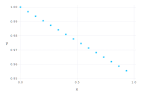

In [10]:
plot(x=X,y=F)

And let's try the right point rule method--for this case, the knots range from 1 to $n$.

In [14]:
X = [k/n for k in 1:n];

In [16]:
F,cnd = solve_integral_eq_rpr((x,y) -> x*y, x -> 1 - x/2, n);

In [17]:
cnd

2.5803278688524585

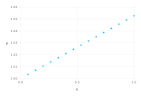

In [18]:
plot(x=X,y=F)

If we greatly increase the number of knots, we discover that the solution appears to converge to the constant function. Here is the solution with 250 knots. We should have a theoretical understanding of the convergence rate.  Another day.

In [19]:
n=250;

In [20]:
X = [k/n for k in 1:n];

In [21]:
F,cnd = solve_integral_eq_rpr((x,y) -> x*y, x -> 1 - x/2, n);

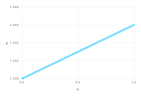

In [22]:
plot(x=X,y=F)

Maybe the average of these the left point rule and the right point rule methods would work better--the average would be the trapezoidal rule.  And that's your homework.

Finally, by explicit calculation, we know that the equation 
\begin{equation}
   F(x) = g(x) + \int_0^1 3 x y F(y) \, \mathrm{d} y,
\end{equation}
does _not_ have a solution.  What happens if we ask our numerical solver to solve it?  Let's see.  First we'll try 15 knots.  The matrix condition number is OK--it's just about 28.1.

In [23]:
n = 15;

In [27]:
F,cnd = solve_integral_eq_lpr((x,y) -> 3*x*y, x -> 1 - x/2, n);

In [28]:
X = [k/n for k in 0:n-1];

A plot shows the solution is about linear and ranges from about 1 to 10.

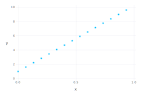

In [30]:
plot(x=X,y=F)

Now let's double the number of knots and try again.  The matrix condition number is now about 65, but that's still just fine.

In [31]:
n=30;

In [32]:
F,cnd = solve_integral_eq_lpr((x,y) -> 3*x*y, x -> 1 - x/2, n);

In [33]:
cnd

64.99999500624217

In [34]:
X = [k/n for k in 0:n-1];

Again, the solution looks approximately linear, but the solution now ranges from about 1 to 20. Apparently as $n$ grows, the numerical solution doesn't converge. The lesson is that a sturdy theoretical understanding of the existence of a solution is needed to keep ourselves from being duped.

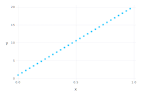

In [35]:
plot(x=X,y=F)